# 2019 Fordgo Bike Data Exploration 
## by Long Nguyen

**DATASET:** This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset consists of 183412 trips recorded on February and March 2019. 

In [174]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

> 

## ACCESSING DATA:

In [175]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [176]:
df.shape

(183412, 16)

**COMMMENT:** There are 183412 observations with 16 column values

In [177]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

**COMMENT:** There seems to be some problems with columns' data types and the mismatch of observations

## CLEANING DATA:

In [179]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [180]:
df = df.drop(['start_station_latitude','start_station_longitude','end_station_latitude', 'end_station_longitude','bike_id'],axis=1)

In [181]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
end_station_id              197
end_station_name            197
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

**COMMENT:** There are 17318 null values in 6 columns 

In [182]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [183]:
# dropping all the NA values
df.dropna(inplace=True)
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [184]:
df.shape

(174952, 11)

**COMMENT:** There are 174952 observations after getting rid of the null values 

In [185]:
#Converting columns' data types for consistency and logic
df['start_time'] = pd.to_datetime(df.start_time)
df['end_time'] = pd.to_datetime(df.end_time)
df['member_birth_year'] = df['member_birth_year'].astype('int64')

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   user_type                174952 non-null  object        
 8   member_birth_year        174952 non-null  int64         
 9   member_gender            174952 non-null  object        
 10  bike_share_for_all_trip  174952 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 16.0+ MB


In [187]:
df['start_time_month'] = df['start_time'].dt.strftime("%B")
df['end_time_month'] = df['end_time'].dt.strftime("%B")
df['start_time_hour']=df['start_time'].dt.hour
df['end_time_hour']=df['end_time'].dt.hour
df['start_time_day']=df['start_time'].dt.strftime("%A")
df['end_time_day']=df['end_time'].dt.strftime("%A")
df['member_age'] = 2021 - df['member_birth_year'] #default for 2021

In [188]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_month,end_time_month,start_time_hour,end_time_hour,start_time_day,end_time_day,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,Customer,1984,Male,No,February,March,17,8,Thursday,Friday,37
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),Customer,1972,Male,No,February,March,12,5,Thursday,Friday,49
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,Subscriber,1989,Other,No,February,March,17,4,Thursday,Friday,32
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,Subscriber,1974,Male,Yes,February,March,23,0,Thursday,Friday,47
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,Subscriber,1959,Male,No,February,March,23,0,Thursday,Friday,62


In [189]:
df.shape

(174952, 18)

**COMMENT:** It seem like the dataframe is consistent and good for further analysis

### What is the structure of your dataset?

> There are 174952 observations and 18 columns

### What is/are the main feature(s) of interest in your dataset?

> I would like to find out the relationship between bikers' characteristics (age, gender, user type),start time,end time (day of the week and month) and the trip durations.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

    1. (discrete) start_station_id, end_station_id, member_age, member_gender, user_type, start_time_day (week), end_time_day (week), start_time_hour, end_time_hour
    
    2. (continuous) duration_sec

## Univariate Exploration:

<ipython-input-190-d1f1cb8b2c6a>:8: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([0, 100000, 0, 12500])


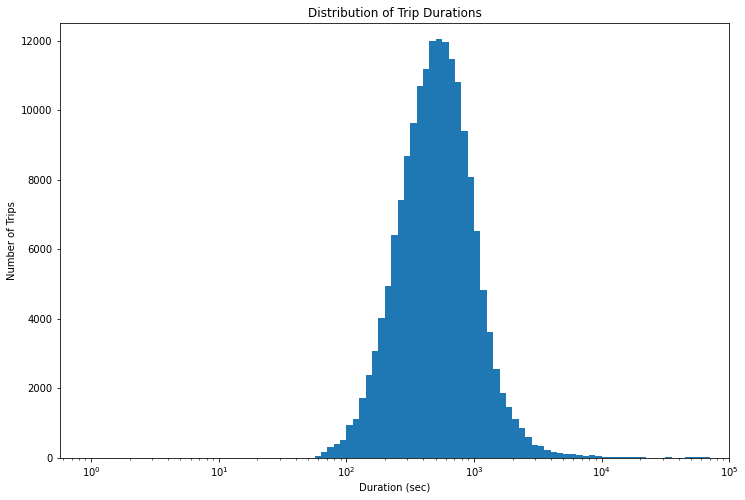

In [190]:
bins = 10 ** np.arange(0, np.log10(df['duration_sec'].max())+0.05, 0.05)
plt.figure(figsize=[12, 8])
plt.hist(data = df,x='duration_sec', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.axis([0, 100000, 0, 12500])
plt.show()

**COMMENT:** It seems like a typical/average trip duration would last around 800 to 1000 seconds (less than half an hours). 

In [191]:
df['start_time_month'].value_counts()

February    174952
Name: start_time_month, dtype: int64

Text(0, 0.5, 'Count')

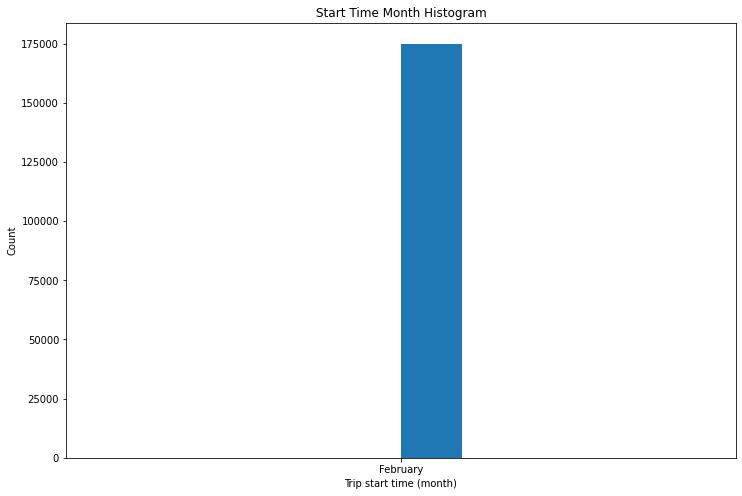

In [192]:
plt.figure(figsize=[12, 8])

plt.hist(data = df,x='start_time_month')
plt.title('Start Time Month Histogram')
plt.xlabel('Trip start time (month)')
plt.ylabel('Count')

**COMMENT:** The data only provide us only individual rides in February

In [193]:
df['end_time_month'].value_counts()

February    174938
March           14
Name: end_time_month, dtype: int64

Text(0, 0.5, 'Count')

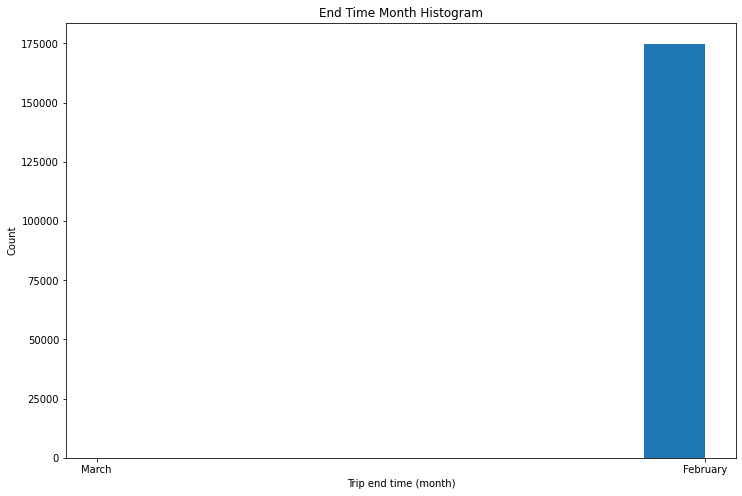

In [194]:
plt.figure(figsize=[12, 8])

plt.hist(data = df,x='end_time_month')
plt.title('End Time Month Histogram')
plt.xlabel('Trip end time (month)')
plt.ylabel('Count')

**COMMENT:** Since most individual rides only last less than 30 minutes (from above). It is expected that he/she will end on the same day (same month). There are 14 observations ending on March because some carry out the trip at around 23:00 of the 28th of February, so it is not surprise they end on March

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: start_time_day, dtype: int64


Text(0.5, 1.0, 'Start time day of the week histogram')

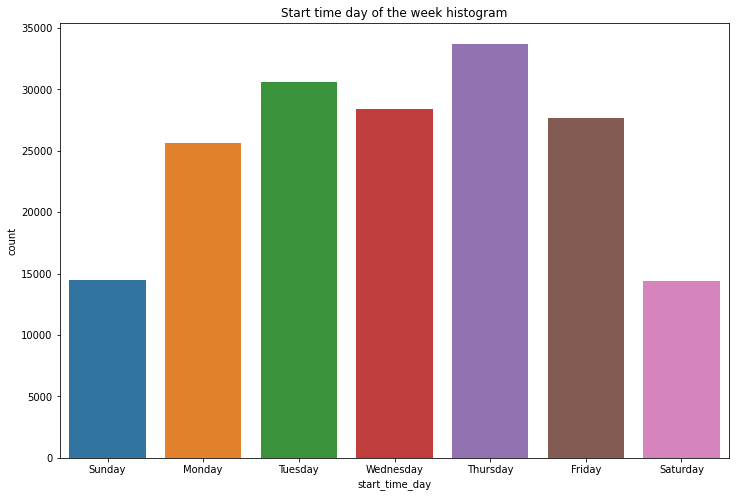

In [227]:
print(df.start_time_day.value_counts())
plt.figure(figsize=[12, 8])
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
sb.countplot(data = df,x='start_time_day',order=order)
plt.title('Start time day of the week histogram')

Text(0.5, 1.0, 'End time day of the week histogram')

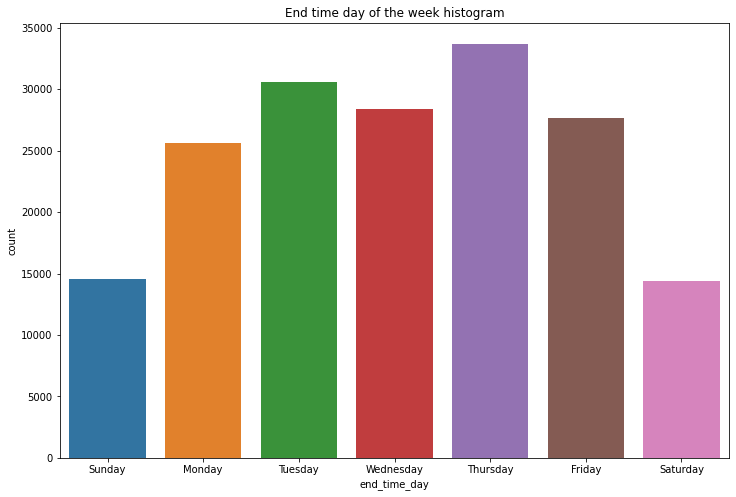

In [197]:
plt.figure(figsize=[12, 8])
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
sb.countplot(data = df,x='end_time_day', order = order)
plt.title('End time day of the week histogram')

**COMMENT:** 
> It can be implied that most people end their trip on the same day since the distributions of start time's day of the week and end time's day of the week are almost identical.

> Most riders start and end on Thursday. 

>The riders don't seem to start the trip on weekend.

Text(0.5, 1.0, 'Start time hour histogram')

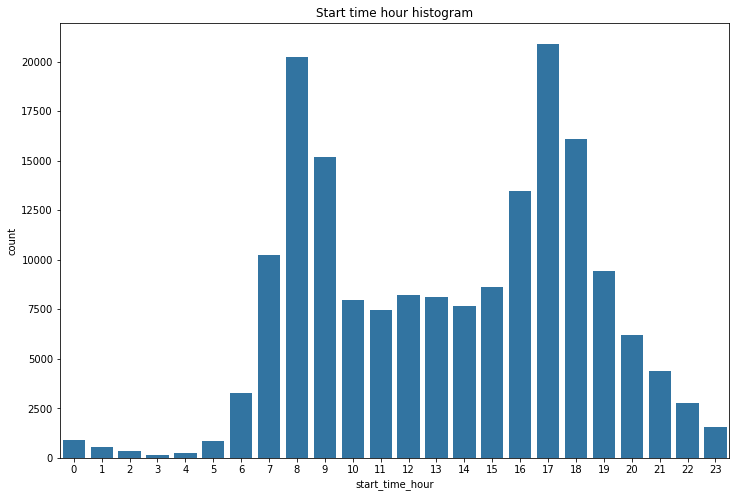

In [198]:
plt.figure(figsize=[12, 8])

sb.countplot(data = df, x = 'start_time_hour', color = sb.color_palette()[0])
plt.title('Start time hour histogram')

Text(0.5, 1.0, 'End time hour histogram')

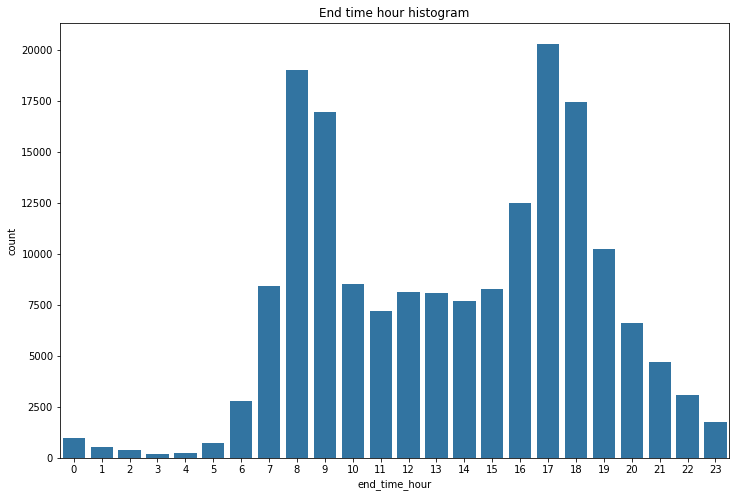

In [199]:
plt.figure(figsize=[12, 8])

sb.countplot(data = df, x = 'end_time_hour', color = sb.color_palette()[0])
plt.title('End time hour histogram')

**COMMENT:** 8:00 and 17:00 are the two peak hours which have most riders.

Text(0.5, 1.0, 'Gender distribution of bikers')

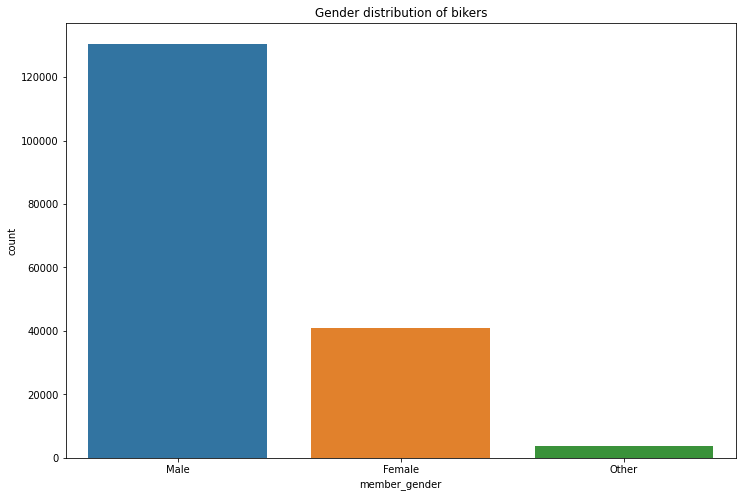

In [200]:
order = ['Male','Female','Other']
plt.figure(figsize=[12, 8])
sb.countplot(data = df, x = 'member_gender', order=order)
plt.title('Gender distribution of bikers')

**COMMENT:** Most riders are male (Male riders are more than 3 times female riders, other riders are not a lot)

In [201]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_month,end_time_month,start_time_hour,end_time_hour,start_time_day,end_time_day,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,Customer,1984,Male,No,February,March,17,8,Thursday,Friday,37
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),Customer,1972,Male,No,February,March,12,5,Thursday,Friday,49
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,Subscriber,1989,Other,No,February,March,17,4,Thursday,Friday,32
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,Subscriber,1974,Male,Yes,February,March,23,0,Thursday,Friday,47
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,Subscriber,1959,Male,No,February,March,23,0,Thursday,Friday,62


Text(0.5, 1.0, 'Gender histogram')

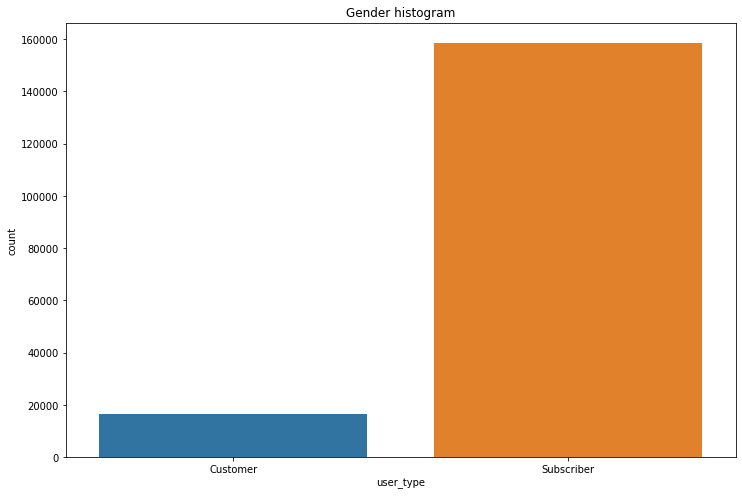

In [202]:
plt.figure(figsize=[12, 8])
sb.countplot(data = df, x = 'user_type')
plt.title('Gender histogram')

**COMMENT:** Most riders are subsribers of Ford gobike

Text(0.5, 1.0, "Bikers' age histogram")

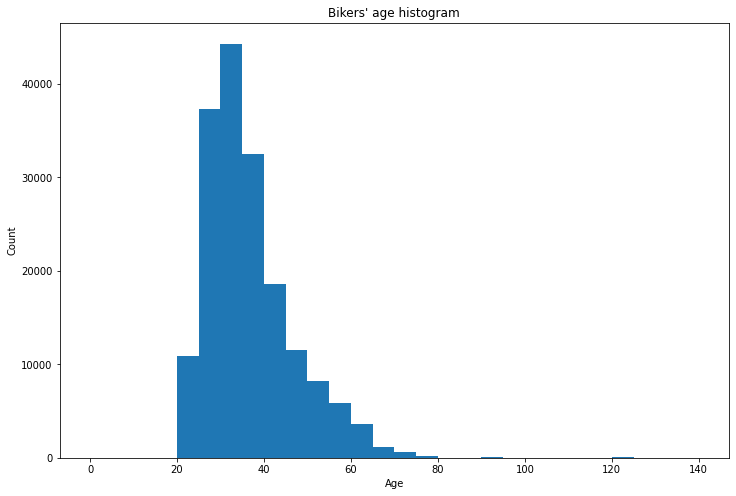

In [203]:
bins = np.arange(0, df['member_age'].max(), 5)
plt.figure(figsize=[12, 8])
plt.hist(data=df,x='member_age',bins=bins)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title("Bikers' age histogram")

**COMMENT:** Most bikers are around 30 to 40. There is an outlier that recorded a user's age to be 143 (I will leave it there since I did not find any issue with the data)

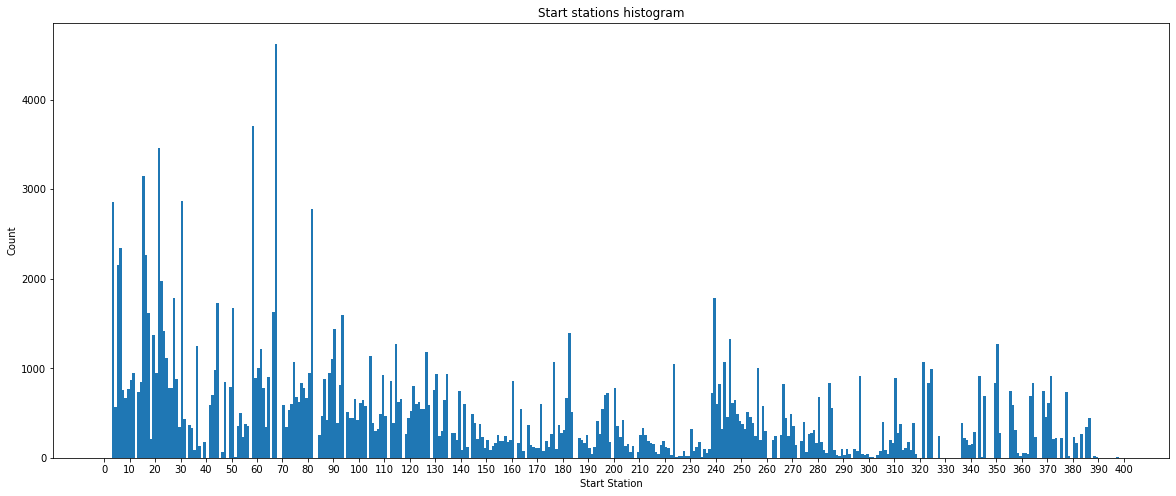

In [204]:
bins = np.arange(0, df['start_station_id'].astype(float).max()+1, 1)

plt.figure(figsize=[20, 8])
plt.xticks(range(0, 410, 10))
plt.hist(data = df, x = 'end_station_id', bins = bins)
plt.title('Start stations histogram')
plt.xlabel('Start Station')
plt.ylabel('Count')
plt.show()

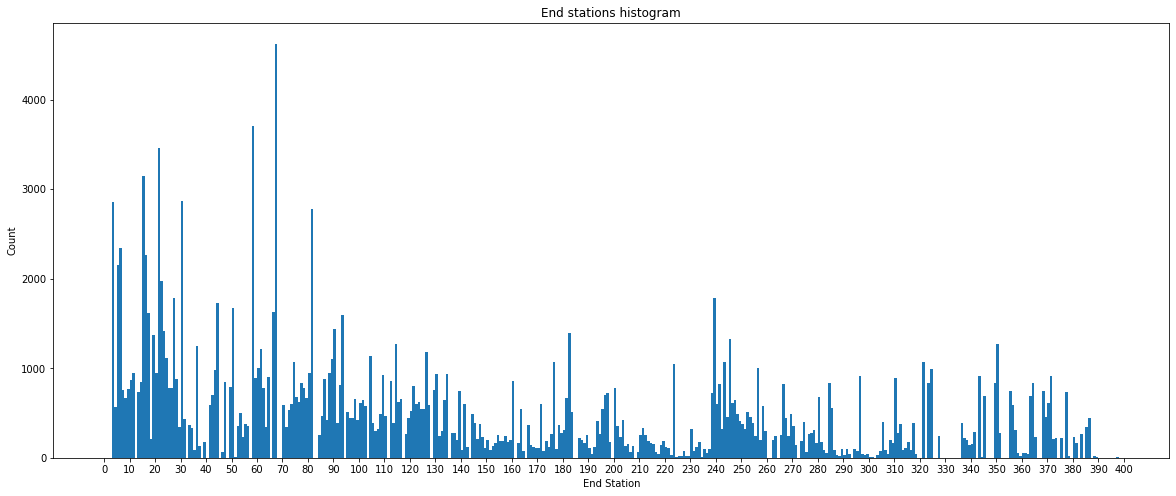

In [205]:
bins = np.arange(0, df['end_station_id'].astype(float).max()+1, 1)

plt.figure(figsize=[20, 8])
plt.xticks(range(0, 410, 10))
plt.hist(data = df, x = 'end_station_id', bins = bins)
plt.title('End stations histogram')
plt.xlabel('End Station')
plt.ylabel('Count')
plt.show()

**COMMENT:** Start and end station's ids seem to be identical. Most gather at ID 67 (approximately)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
* A typical trip would last less than 30 minutes.

* Most of the bikers tend to be subscribers of the company.

* There are more trips during 8-9AM timeframe and at 17PM.

* There are more male riders than both female and others.

* Most of the bikers are in their 30s.

* There are more trips in the mid-week (Tuesday to Thursday). Peak on Thursday.

* Bikers tend to start and end on the same station. The data implies ID 67 to be the most common start/end station ID.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* There is an outlier that recorded a user's age to be 143 (I will leave it there since I did not find any issue with the data). I won't be changing the data since the further explorations are not affected by such issue.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## Pairs that I am planning to explore:

* Start/end day of the week vs duration (I would like to see how much time the bikers spend on each day)

* start/end time hour vs gender/user_type (I would like to see the hours that bikers go on the trip the most)

* gender vs duration (I strongly believe the pair will tell something about different genders and the sport)

* age vs duration (It is obvious that these two variables will be correlated based on common sense)

* age vs user_type (I want to investigate the ratio between subscribers and users)

In [206]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_time_month', 'end_time_month', 'start_time_hour',
       'end_time_hour', 'start_time_day', 'end_time_day', 'member_age'],
      dtype='object')

<AxesSubplot:xlabel='end_time_day', ylabel='duration_sec'>

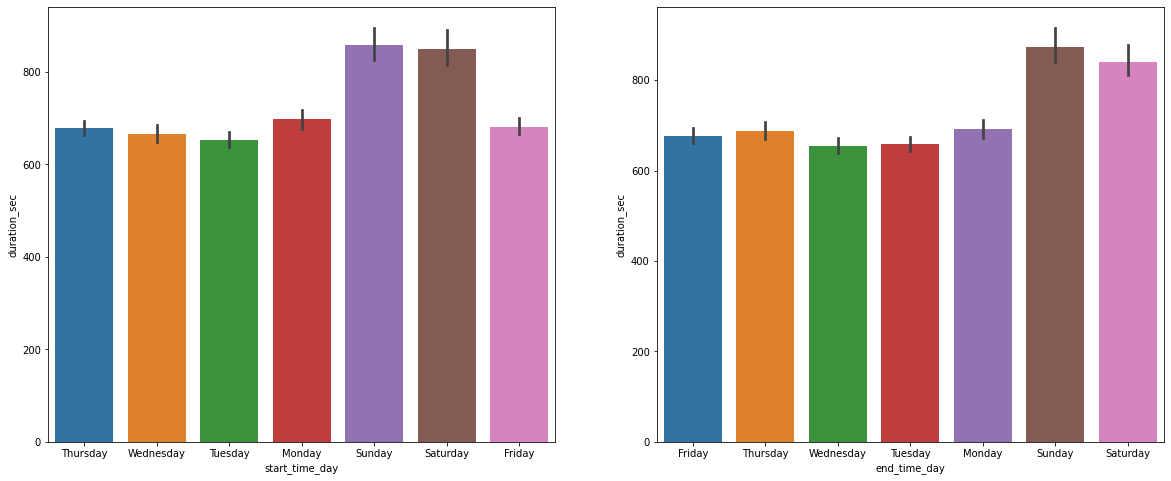

In [218]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = [20,8])
sb.barplot(data=df, x='start_time_day', y='duration_sec',ax = ax[0])
sb.barplot(data=df, x='end_time_day', y='duration_sec',ax = ax[1])

**COMMENT:** It seems like people tend to go on a longer bike trip on the weekend comparing to week days

<AxesSubplot:xlabel='end_time_hour', ylabel='count'>

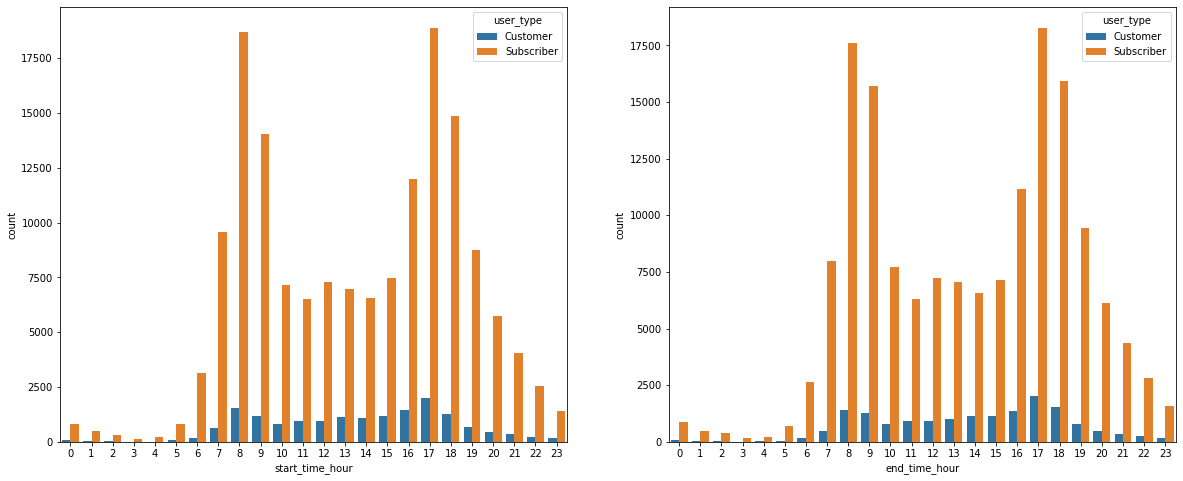

In [219]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = [20,8])
sb.countplot(data = df, x = 'start_time_hour', hue = 'user_type',ax = ax[0])
sb.countplot(data = df, x = 'end_time_hour', hue = 'user_type',ax = ax[1])

**COMMENT:** There are 2 noticable peaks at 8AM and 17PM, and some high peaks around it (7-9AM, 18PM). It seems like the bikers take on the trip on these timeframes. The distribution between start and end time hour are almost the same indicating that most bikers start and end their trip on the same hour. Some end on the next hour but no more. The amount of subsribers are way more than customers.

<AxesSubplot:xlabel='end_time_hour', ylabel='count'>

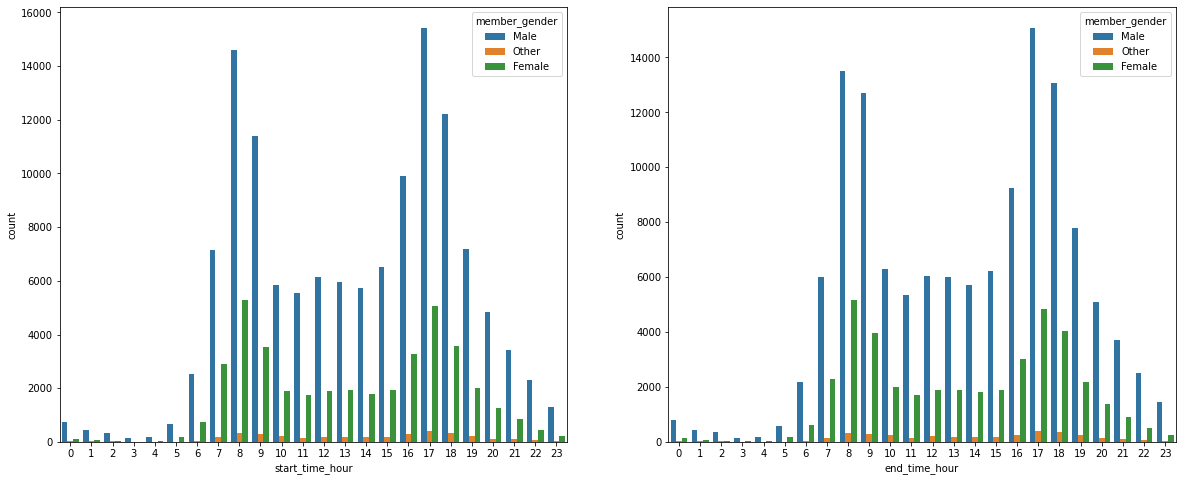

In [222]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = [20,8])
sb.countplot(data = df, x = 'start_time_hour', hue = 'member_gender',ax = ax[0])
sb.countplot(data = df, x = 'end_time_hour', hue = 'member_gender',ax = ax[1])

**COMMENT:** 

In [214]:
df['member_gender'].unique()

array(['Male', 'Other', 'Female'], dtype=object)

Text(0, 0.5, 'Average duration in seconds(s)')

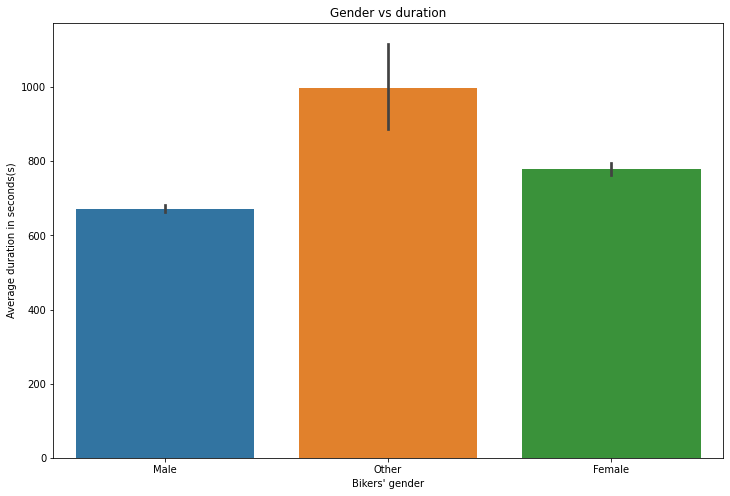

In [209]:
plt.figure(figsize=[12, 8])
sb.barplot(data=df, x='member_gender', y='duration_sec')
plt.title('Gender vs duration')
plt.xlabel("Bikers' gender")
plt.ylabel('Average duration in seconds(s)')

**COMMENT:** The visualization shows quite a shocking result. My initial hypothesis would be that males tend to spend more time on the trip. The actual result shows that gender type of others spend the most time on the bike trip then female, last would be male.

Text(0, 0.5, 'Bikers age')

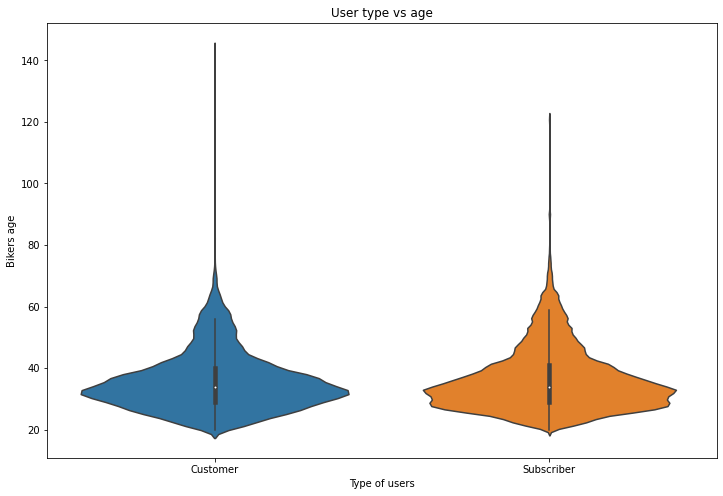

In [215]:
plt.figure(figsize=[12, 8])
sb.violinplot(data=df, x='user_type', y='member_age', innner='quartile')
plt.title('User type vs age')
plt.xlabel("Type of users")
plt.ylabel('Bikers age')

**COMMENT:** It seems like for both user types, the ages gather around 30s. The distributions are almost identical

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* Most bikers spend more time on the trip during weekends even though there are more people go on the trip on Thursday (Uni result)

* Timeframes 8-9AM and 16-18PM seem to be the interval bikers mostly go out on a trip. It could be understandable since those timeframes mean the start and end of each day before and after work/school.

* Most bikers for customers and subsribers tend to be in their 30s.

* Trip duration for others is longer than female's. Female's trip duration is longer than male's.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* It is surprising to know gender type 'others' spends more time on the trip than females, and females spend longer time than males.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Text(0, 0.5, 'Duration(s)')

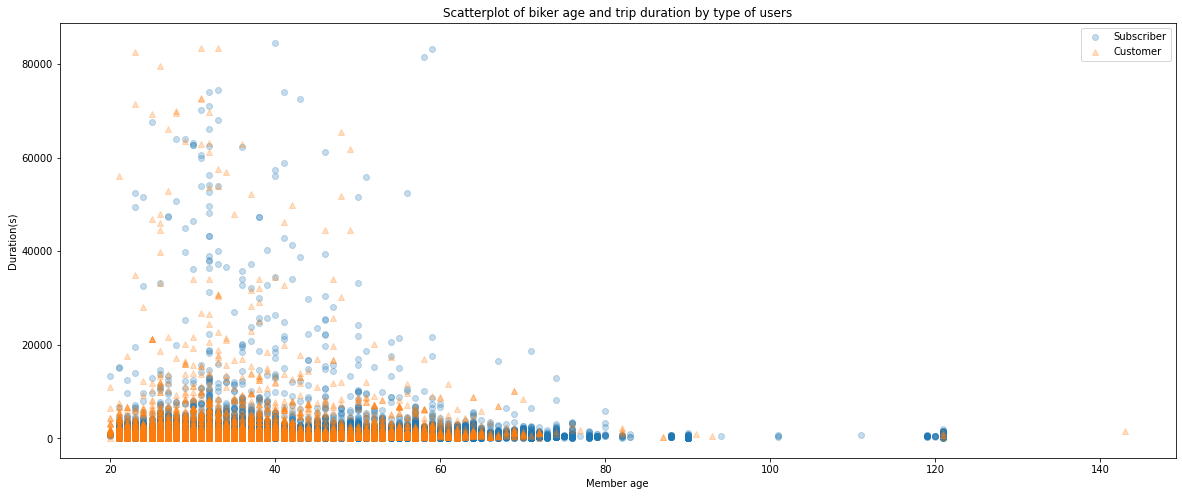

In [288]:
cat_markers = [['Subscriber', 'o'], ['Customer', '^']]
plt.figure(figsize=[20, 8])
for cat, marker in cat_markers:
    df_cat = df[df['user_type'] == cat]
    plt.scatter(data = df_cat, x = 'member_age', y = 'duration_sec', marker = marker,alpha = 0.25)
plt.legend(['Subscriber','Customer'])
plt.title('Scatterplot of biker age and trip duration by type of users')
plt.xlabel('Member age')
plt.ylabel('Duration(s)')

**COMMENT:** There is not any significant difference can be seen from the trip duration between types of users. Both customers and subscrbers at the age of 20 to mid 30s tend to spend more time on a bike trip.

Text(0, 0.5, 'Duration(s)')

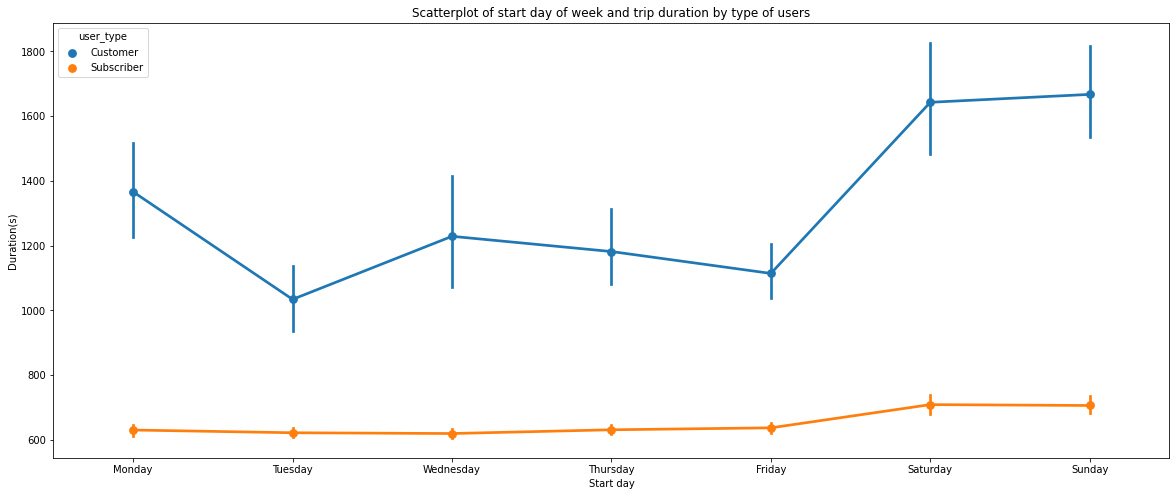

In [317]:
plt.figure(figsize=[20, 8])
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
sb.pointplot(data = df, x = 'start_time_day', y = 'duration_sec', hue='user_type', order=order)
plt.title('Scatterplot of start day of week and trip duration by type of users')
plt.xlabel('Start day')
plt.ylabel('Duration(s)')

**COMMENT:** Customers spend more time on the trip than subscribers and most on weekend. This result is surprising

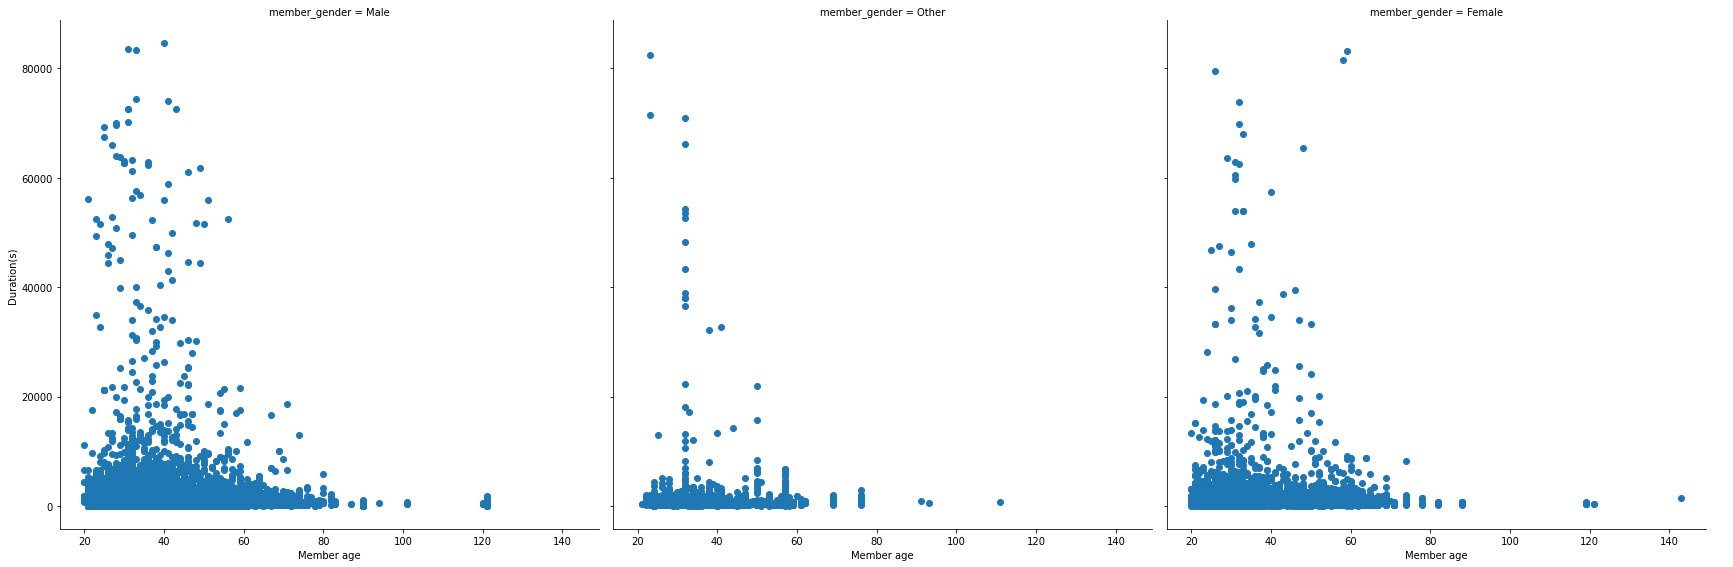

In [299]:
g = sb.FacetGrid(data = df, col = 'member_gender',height=8)
g.map(plt.scatter, 'member_age', 'duration_sec')
g.set_xlabels('Member age')
g.set_ylabels('Duration(s)')
g.add_legend()

**COMMENT:** Most bikers of 3 genders type are around 30 40 years old spending more time on the trip than others. From visualization, I find out that the outlier 143 is a female rider.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* People tend to spend more time on the bike trip on weekends than week day. Customers spend more time on trip than subscribers
* Most bikers are in their mid 30s that spend more time that people of other ages in spite of the gender difference 

### Were there any interesting or surprising interactions between features?

* I don't expect that subscribers spend relatively less time on trip than customers. 